In [134]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# 1 задание

In [163]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 2 задание 

In [136]:
df_test = df.drop(df.columns[[8, 9]], axis = 1)
def check(val):
    return val.max(), val.min(), val.mean(), val.median(), val.mode()[0], val.std()

df_stats = df_test.apply(check)
df_stats.index = ['max', 'min', 'mean', 'median', 'mode', 'std']
df_stats

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
median,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281


# 3 задание

In [137]:
df_corr = df.corr()
df_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [161]:
def max_min_corr(some_df): # функция по поиску минимумов и максимумов всего датафрейма
    max_el = 0
    min_el = 0
    max_col = 0
    min_col = 0
    for i in range(some_df.shape[1]): # итерирую по столбцам датафрейма
        some_df.loc[some_df[some_df.columns[i]] == 1, some_df.columns[i]] = 0 # убираю единицы из датафрейма, Чтобы не мешали находить max
        if some_df[some_df.columns[i]].max() > max_el: # ищу максимумы
            max_el = some_df[some_df.columns[i]].max()
            max_col = i # номер колонки с максимумом
        if some_df[some_df.columns[i]].min() < min_el: # ищу минимумы
            min_el = some_df[some_df.columns[i]].min()
            min_col = i # номер колонки с минимумом
    return(f"максимальная корреляция между {some_df.columns.values[max_col]} и {some_df.index[some_df[some_df.columns[max_col]] == max_el]}, минимальная корреляция между {some_df.columns.values[min_col]} и {some_df.index[some_df[some_df.columns[min_col]] == min_el]}")

In [ ]:
# не знаю только как в коде и как в выводе перенести текто для удобтва на новую строку, /n не работает
# еще я здесь удаляю из датафрейма единицы, не очень круто, но для этой задачи норм, Чуть что придумал бы что-нибудь 

In [162]:
max_min_corr(df_corr) 

"максимальная корреляция между number_project и Index(['average_montly_hours'], dtype='object'), минимальная корреляция между satisfaction_level и Index(['left'], dtype='object')"

# 4 задание

In [164]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

# 5 задание

In [179]:
df_task5 = df[['salary', 'department']].groupby('salary').count().sort_values('department', ascending=True)
df_task5

,department
salary,
high,1237
medium,6446
low,7316


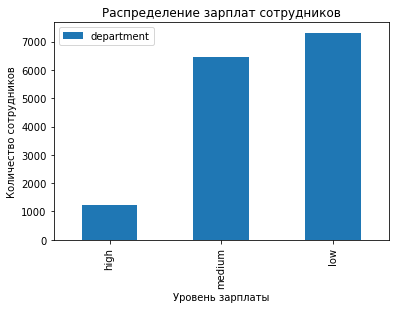

In [181]:
df_task5.plot(kind='bar',
            title='Распределение зарплат сотрудников',
            xlabel='Уровень зарплаты',
            ylabel='Количество сотрудников')

# 6 задание

In [204]:
df_task6 = df[['salary', 'department', 'left']].groupby(['department', 'salary']).count()
df_task6.rename(columns={df_task6.columns[0]: 'number' }, inplace = True)
df_task6

number
department  salary        
IT          high        83
            low        609
            medium     535
RandD       high        51
            low        364
            medium     372
accounting  high        74
            low        358
            medium     335
hr          high        45
            low        335
            medium     359
management  high       225
            low        180
            medium     225
marketing   high        80
            low        402
            medium     376
product_mng high        68
            low        451
            medium     383
sales       high       269
            low       2099
            medium    1772
support     high       141
            low       1146
            medium     942
technical   high       201
            low       1372
            medium    1147

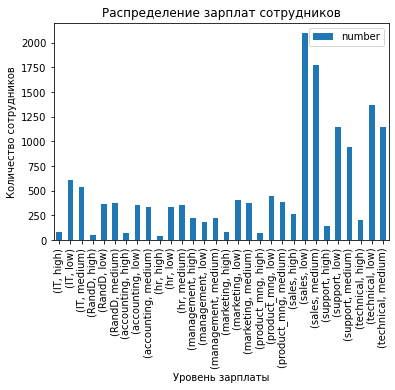

In [205]:
df_task6.plot(kind='bar',
            title='Распределение зарплат сотрудников',
            xlabel='Уровень зарплаты',
            ylabel='Количество сотрудников')

# 7 задание

In [217]:
# Гипотеза неверна. Сотрудники с низкой зп проводят на работе больше времени, чем сотрудники с высокой зп
df_task7 = df[['salary', 'average_montly_hours']].groupby('salary').mean()
df_task7.loc[['high', 'low']]

,average_montly_hours
salary,
high,199.867421
low,200.996583


# 8 задание

In [218]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [229]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [254]:
df_left = df[df['left'] == 1]
df_right = df[df['left'] == 0]

In [267]:
df_left['promotion_last_5years'].value_counts().loc[1]/len(df_left) # процент тех, кого повышали из уволенных

0.005320638476617194

In [269]:
df_right['promotion_last_5years'].value_counts().loc[1]/len(df_right) # процент тех, кого повышали из работающих

0.026251312565628283

In [271]:
df_left['satisfaction_level'].mean() #средняя степень удовлетворенности среди уволенных

0.44009801176140917

In [272]:
df_right['satisfaction_level'].mean() #средняя степень удовлетворенности среди работающих

0.666809590479516

In [273]:
df_left['number_project'].mean() # среднее кол-во проектов среди уволенных

3.8555026603192384

In [275]:
df_right['number_project'].mean() # среднее кол-во проектов среди работающих

3.786664333216661

# 9 задание

In [319]:
df_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [320]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_test, df_test['left'], test_size=0.25)

In [321]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [322]:
lda = LinearDiscriminantAnalysis()

In [323]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [324]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [325]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [326]:
result

,left,Unnamed 0
10625,0.0,NaN
7789,0.0,NaN
10114,0.0,NaN
3440,0.0,0.0
14228,1.0,NaN
...,...,...
13785,0.0,NaN
7997,0.0,NaN
3446,0.0,0.0
13331,0.0,NaN


In [327]:
from sklearn.metrics import accuracy_score

In [328]:
accuracy_score(y_test, lda.predict(X_test))

0.7658666666666667